In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Construct Time Signal
SAMPLING_FREQUENCY = 4 #Hz
TIME_SAMPLED = 19.2 #minutes 
total_num_samples = int(TIME_SAMPLED * SAMPLING_FREQUENCY * 60) 
signal_frequency = .1 #this number of oscillations per unit of time

t = np.linspace(0, TIME_SAMPLED*60, total_num_samples)
#frequency_resolution = SAMPLING_FREQUENCY / number_of_samples

y = 1 * np.sin(2 * np.pi * signal_frequency * t) 

In [ ]:
total_num_samples

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(t,y, '.-')
plt.xlabel("time (s)")
plt.show()

In [ ]:
#Break the data into segments

overlapPercent = 0.5
nonOverlapPercent = 1-overlapPercent
N_Segments = 17

nonOverlapSize = int(len(y) // (N_Segments + overlapPercent / nonOverlapPercent))
overlapSize = int(overlapPercent * nonOverlapSize / nonOverlapPercent)
segmentSize = overlapSize + nonOverlapSize
#segmentSize = (len(t) // (N_Segments + 1)) * 2

print("overlap size", overlapSize)
print("non-overlap size", nonOverlapSize)
print("segment size", segmentSize)

segments = []
for i in range(0, len(y), nonOverlapSize):
    if i+segmentSize <= len(y):
        segments.append(y[i:i+segmentSize])

print("Segments count", len(segments))
print(list(map(len, segments)))

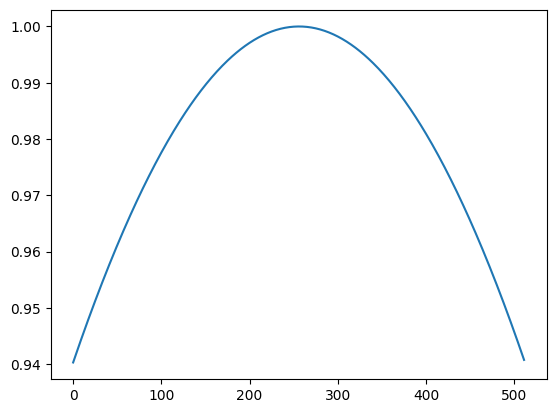

In [6]:
#Apply kaiser bessel window
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

window = signal.windows.kaiser(512, beta = 0.5, sym = False)
plt.plot(window)

In [10]:
A = fft(window)
A

array([ 5.01748806e+02-0.00000000e+00j, -6.21422204e+00+4.85722573e-17j,
       -1.53162045e+00+3.46944695e-18j, -6.78986494e-01+7.28583860e-17j,
       -3.81615070e-01+3.46944695e-18j, -2.44158174e-01-1.06251813e-16j,
       -1.69538844e-01-3.90312782e-17j, -1.24562268e-01+5.58364119e-17j,
       -9.53773928e-02+1.30104261e-18j, -7.53713658e-02+5.32343267e-17j,
       -6.10626846e-02-2.73218947e-17j, -5.04766924e-02-9.97465999e-18j,
       -4.24256422e-02+8.45677695e-18j, -3.61603117e-02+6.93889390e-18j,
       -3.11891395e-02+1.14925430e-17j, -2.71787662e-02+1.00505541e-16j,
       -2.38966473e-02+6.50521303e-19j, -2.11765619e-02+1.15792792e-16j,
       -1.88971431e-02+4.28259858e-17j, -1.69681002e-02+3.94649591e-17j,
       -1.53211372e-02-2.54787511e-18j, -1.39038224e-02+1.12757026e-17j,
       -1.26753639e-02-1.51246203e-17j, -1.16036407e-02+6.58652820e-17j,
       -1.06630815e-02-2.05998413e-18j, -9.83312493e-03+5.68121938e-17j,
       -9.09708637e-03-6.39679282e-18j, -8.44131270